<a href="https://colab.research.google.com/github/shurmez01/MAT422/blob/main/2_4_MLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.4 Maximum Likelihood Estimation

> Maximum likelihood estimation (MLE) is an effective approach of estimating the parameters of a probability distribution through maximizing a likelihood function. The point in the parameter space that maximizes the likelihood function is called the maximum likelihood estimate. The logic of maximum likelihood is both intuitive and flexible. As a result, the method has become a dominant means of statistical inference


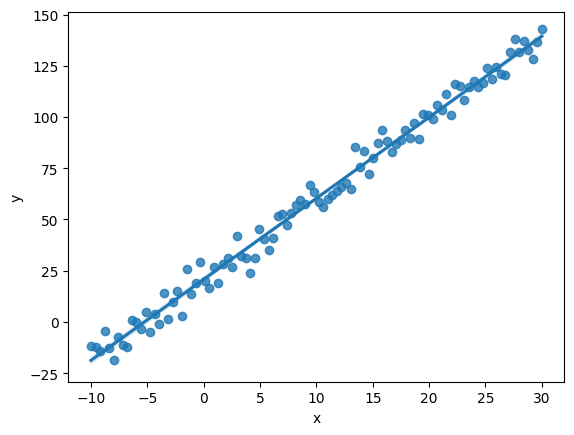

In [6]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize


# generate an independent variable
x = np.linspace(-10, 30, 100)
# generate a normally distributed residual
e = np.random.normal(10, 5, 100)
# generate ground truth
y = 10 + 4*x + e
df = pd.DataFrame({'x':x, 'y':y})
df.head()


sns.regplot(x='x', y='y', data = df)
plt.show()

The data is normally distributed, and the output variable is a continuously varying number. Hence, we can use the Ordinary Least Squares (OLS) method to determine the model parameters and use them as a benchmark to evaluate the Maximum Likelihood Estimation approach. Apply the OLS algorithm to the synthetic data and find the model parameters.

In [13]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize

features = api.add_constant(df.x)
model = api.OLS(y, features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     7663.
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           7.43e-95
Time:                        04:14:53   Log-Likelihood:                -307.10
No. Observations:                 100   AIC:                             618.2
Df Residuals:                      98   BIC:                             623.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.7456      0.694     29.881      0.000      19.368      22.123
x              3.9560      0.045     87.540      0.000       3.866       4.046
==============================================================================
Omnibus:                        1.651   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.438   Jarque-Bera (JB):                1.317
Skew:                           0.071   Prob(JB):                        0.518
Kurtosis:                       2.456   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# define likelihood function
def MLERegression(params):
 intercept, beta, sd = params[0], params[1], params[2] # inputs are guesses at our parameters
 yhat = intercept + beta*x # predictions
# next, we flip the Bayesian question
# compute PDF of observed values normally distributed around mean (yhat)
# with a standard deviation of sd
 negLL = -np.sum( stats.norm.logpdf(y, loc=yhat, scale=sd) )
# return negative LL
 return(negLL)


# let’s start with some random coefficient guesses and optimize
guess = np.array([5,5,2])
results = minimize(MLERegression, guess, method = 'Nelder-Mead',
 options={'disp': True})

Optimization terminated successfully.
         Current function value: 307.099398
         Iterations: 106
         Function evaluations: 188


In [15]:

resultsdf = pd.DataFrame({'coef':results['x']})
resultsdf.index=['constant','x','sigma']
np.round(resultsdf.head(2), 4)

,coef
constant,20.7456
x,3.9560


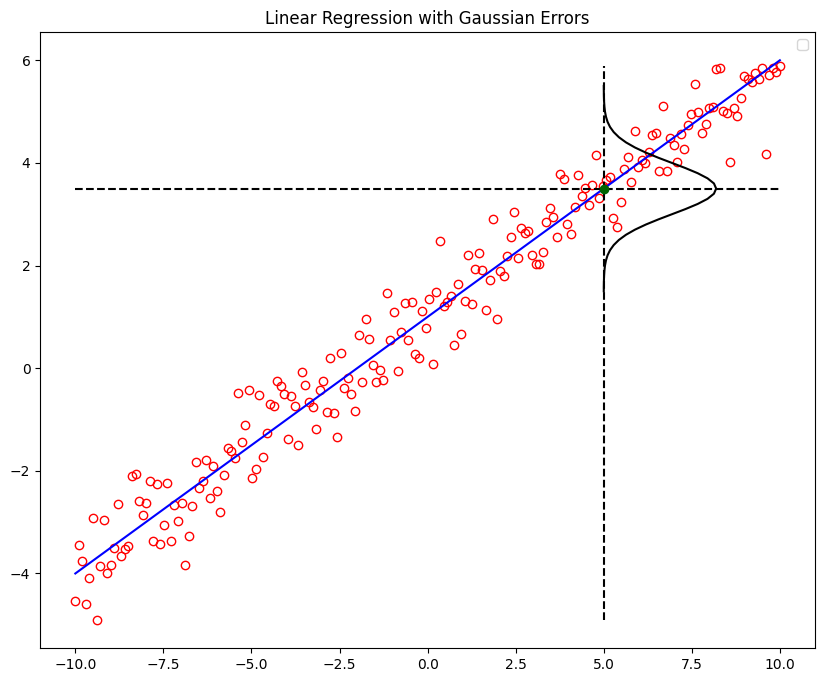

In [17]:
import numpy as np
import matplotlib.pyplot as plt
#
np.random.seed(123)
#
N = 200
beta_0 = 1
beta_1 = 0.5
e_sd = 0.5
#
x = np.linspace(start = -10, stop = 10, num = N)
e = np.random.normal(loc = 0, scale = e_sd, size = len(x))
y = beta_0 + beta_1 * x + e
y_cond_exp = beta_0 + beta_1 * x
# Fit the data
#y_mdl = sm.OLS(y, sm.add_constant(x)).fit()
# Plot the density at specified X axis points:
plot_at = [-5, 0, 5]


from scipy.stats import norm
#
def sideways_dnorm(where_x, where_y, e_var, magnify = 4):
    values = np.arange(start = -2, stop = 2.1, step = 0.1) # calculate density for this interval
    # Y|X ~ Normal(XB, sigma^2)
    # (Y - XB)|X ~ Normal(0, sigma^2)
    dens = norm.pdf(x = values, loc = 0, scale = np.sqrt(e_var))
    x = where_x + dens * np.array(magnify)
    y = where_y + values
    return(np.vstack((x, y)))


plt.figure(num = 4, figsize = (10, 8))
plt.plot(x, y, linestyle = "None", marker = "o",
         color = "red", markerfacecolor = 'None')
plt.title("Linear Regression with Gaussian Errors")
#plt.plot(x, y_mdl.fittedvalues, linestyle = "-", color = "blue")
plt.plot(x, y_cond_exp, linestyle = "-", color = "blue",
        label = "")
for i in range(0, len(plot_at)):
    # y_fit = y_mdl.params[0] + y_mdl.params[1] * plot_at[i]
    y_fit = beta_0 + beta_1 * plot_at[i]
    xy = sideways_dnorm(where_x = plot_at[i],
                       where_y = y_fit,
                       e_var = e_sd**2,#np.var(y_mdl.resid),
                       magnify = 4)
plt.plot(xy[0], xy[1], linestyle = "-", color = "black")
plt.hlines(y = y_fit, linestyle = "--",
               color = "black", xmin = min(x), xmax = max(x))
plt.vlines(x = plot_at[i], linestyle = "--",
                color = "black", ymin = min(y), ymax = max(y))
plt.plot(plot_at[i], y_fit, linestyle = "None",
             marker = "o", color = "darkgreen")
plt.legend()
plt.show()
